In [ ]:
from google.colab import files

uploaded = files.upload()

Saving chrome_metrics_ALLYSON.csv to chrome_metrics_ALLYSON.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="muted", font_scale=1.2)

In [ ]:
df = pd.read_csv("chrome_metrics_ALLYSON.csv", sep=",")

# Exibe as primeiras linhas
df.head()

,timestamp,pid,cpu_percent,cpu_num,read_kBps,write_kBps,ram_livre_kB,ram_usada_kB,ram_buffer_kB,ram_cache_kB
0,2025-07-01 21:23:48,32178,0,2,0.0,0.8,447648,5143160,1644544,690216
1,2025-07-01 21:23:59,32178,0,3,6445.2,552.8,289624,5578004,1580480,477460
2,2025-07-01 21:24:10,32178,0,3,12981.6,4920.4,290584,5533068,1512556,589360
3,2025-07-01 21:24:21,32178,0,1,3319.6,4333.2,268576,5779300,1392424,485268
4,2025-07-01 21:24:32,32178,0,1,2368.8,364.4,262392,5837688,1367168,458320


In [ ]:
df["timestamp"] = pd.to_datetime(df["timestamp"])
df.set_index("timestamp", inplace=True)

In [ ]:
# Calcula estatísticas descritivas
stats_table = df.describe().T
stats_table["median"] = df.median()
stats_table = stats_table[["mean", "median", "std", "min", "max"]]

# Mostra a tabela
import numpy as np
np.round(stats_table, 2)


,mean,median,std,min,max
pid,32178.00,32178.0,0.00,32178.0,32178.0
cpu_percent,0.00,0.0,0.00,0.0,0.0
cpu_num,1.62,1.0,1.15,0.0,3.0
read_kBps,4617.91,1385.4,8408.07,0.0,41557.6
write_kBps,1388.67,566.6,1671.41,0.8,6273.2
ram_livre_kB,340300.00,324242.0,68682.37,255404.0,529724.0
ram_usada_kB,5845978.48,5985154.0,319276.50,5143160.0,6284556.0
ram_buffer_kB,1273908.19,1203396.0,187343.99,1013056.0,1644544.0
ram_cache_kB,465381.33,421278.0,141646.60,254100.0,801240.0


from matplotlib import pyplot as plt
_df_0['mean'].plot(kind='hist', bins=20, title='mean')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['median'].plot(kind='hist', bins=20, title='median')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['std'].plot(kind='hist', bins=20, title='std')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['min'].plot(kind='hist', bins=20, title='min')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='mean', y='median', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='median', y='std', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='std', y='min', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='min', y='max', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['mean'].plot(kind='line', figsize=(8, 4), title='mean')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['median'].plot(kind='line', figsize=(8, 4), title='median')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['std'].plot(kind='line', figsize=(8, 4), title='std')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['min'].plot(kind='line', figsize=(8, 4), title='min')
plt.gca().spines[['top', 'right']].set_visible(False)

# **CPU Usage ao longo do tempo**

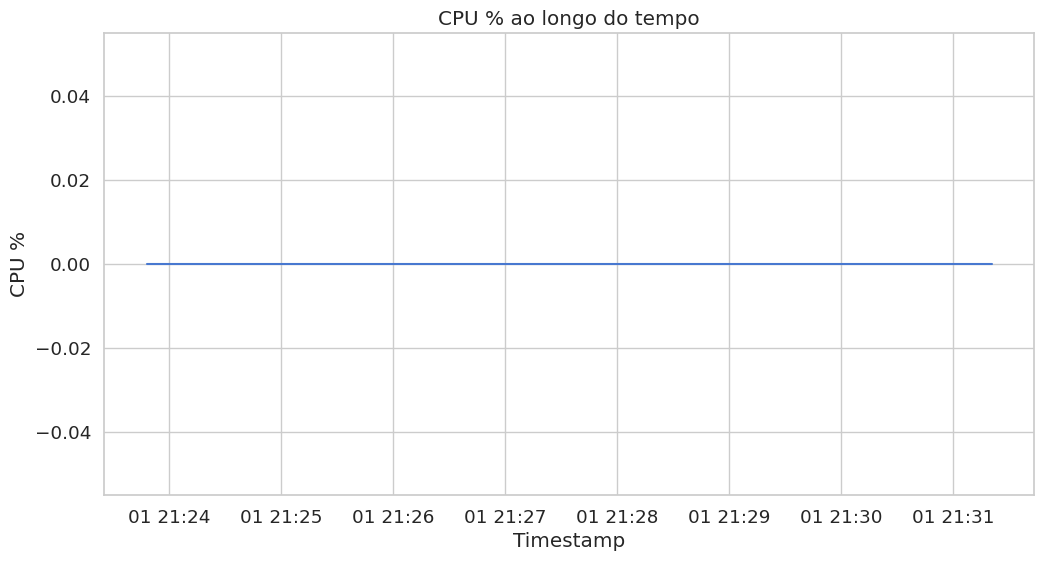

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(x=df.index, y=df["cpu_percent"])
plt.title("CPU % ao longo do tempo")
plt.ylabel("CPU %")
plt.xlabel("Timestamp")
plt.show()

# **Leituras e Escritas em KB/s**

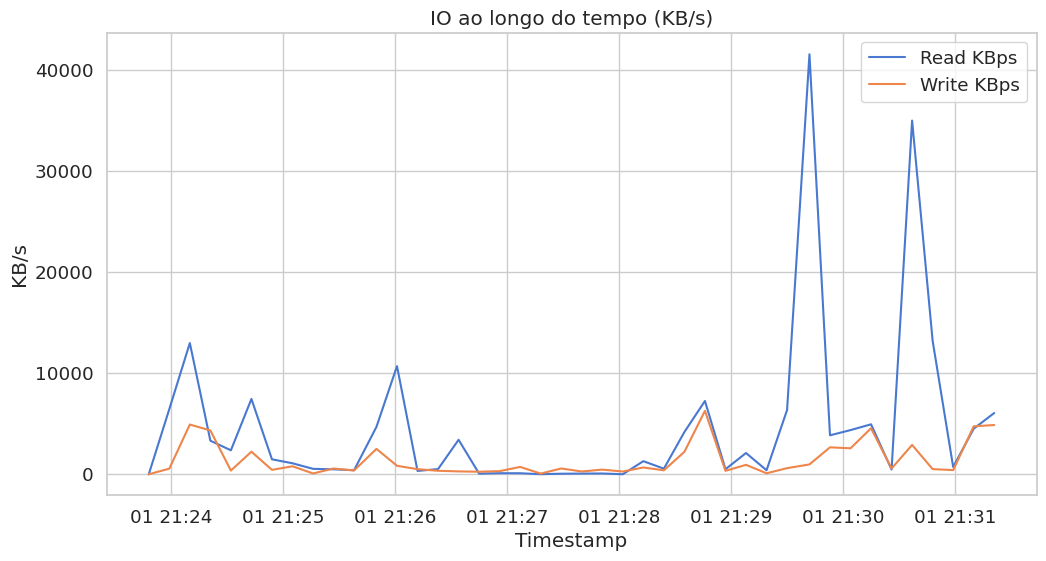

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(x=df.index, y=df["read_kBps"], label="Read KBps")
sns.lineplot(x=df.index, y=df["write_kBps"], label="Write KBps")
plt.title("IO ao longo do tempo (KB/s)")
plt.ylabel("KB/s")
plt.xlabel("Timestamp")
plt.legend()
plt.show()

# **RAM Usada vs Livre**

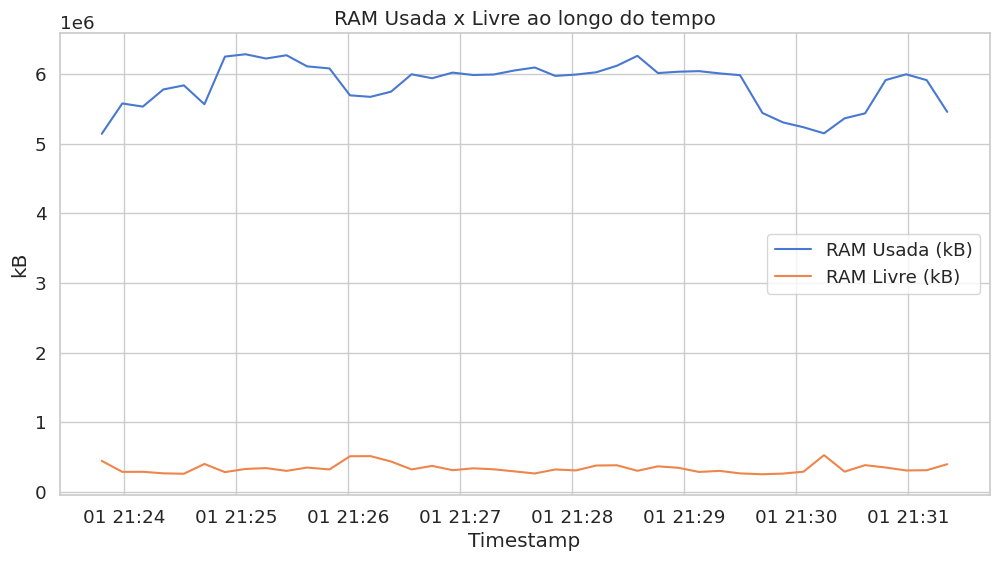

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(x=df.index, y=df["ram_usada_kB"], label="RAM Usada (kB)")
sns.lineplot(x=df.index, y=df["ram_livre_kB"], label="RAM Livre (kB)")
plt.title("RAM Usada x Livre ao longo do tempo")
plt.ylabel("kB")
plt.xlabel("Timestamp")
plt.legend()
plt.show()

# **Boxplot das Métricas**

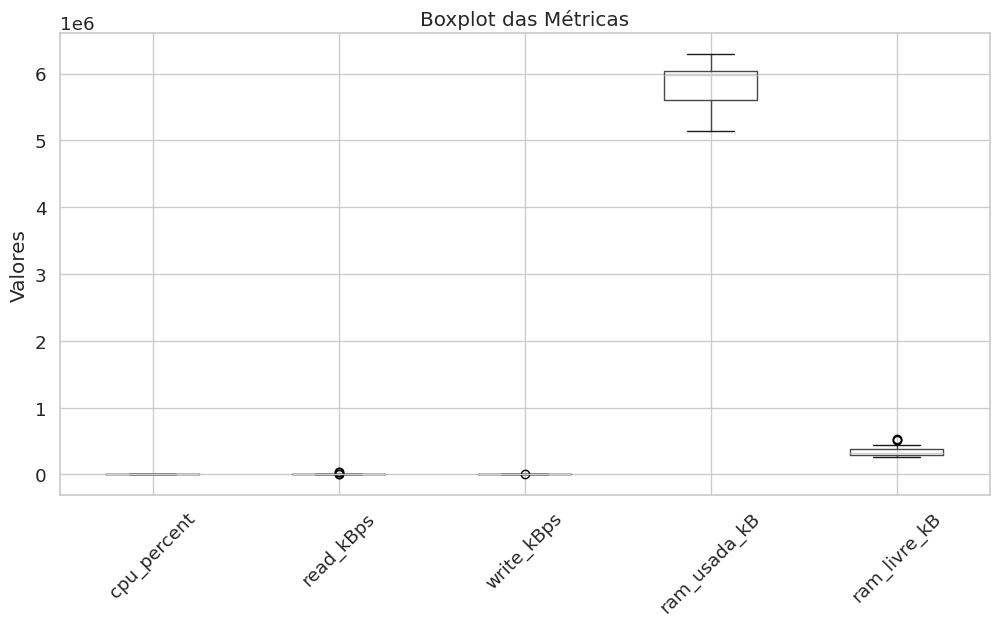

In [ ]:
# Escolha só variáveis numéricas (exceto timestamp e pid)
vars_box = [
    "cpu_percent",
    "read_kBps",
    "write_kBps",
    "ram_usada_kB",
    "ram_livre_kB"
]

plt.figure(figsize=(12,6))
df[vars_box].boxplot()
plt.title("Boxplot das Métricas")
plt.ylabel("Valores")
plt.xticks(rotation=45)
plt.show()

# **Medidas ao longo do tempo**

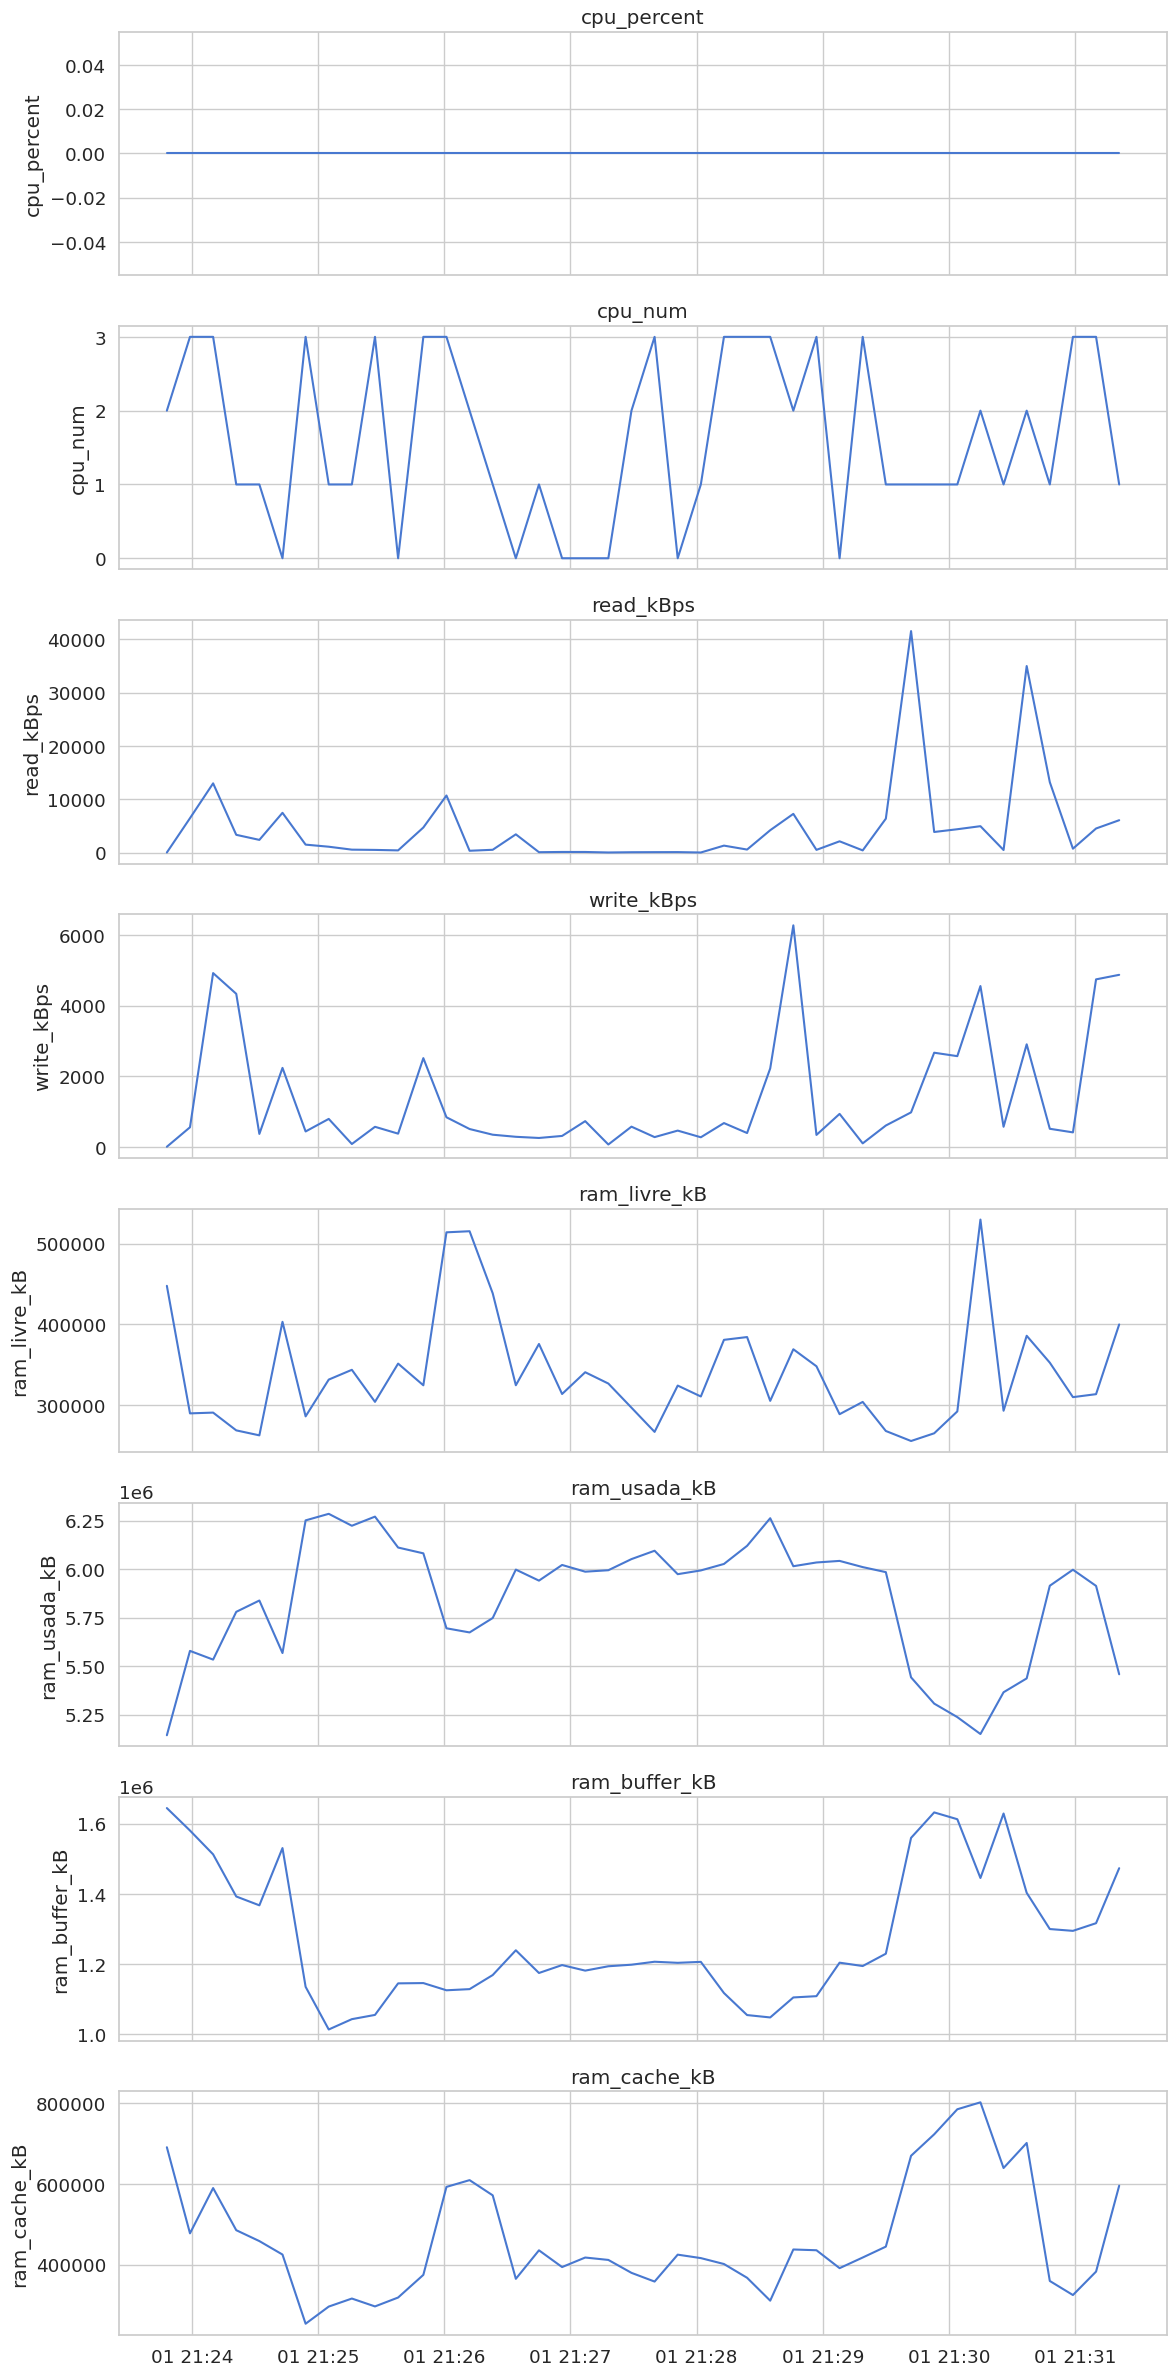

In [ ]:


# Remove PID (não é interessante no gráfico)
df_plot = df.drop(columns=["pid"])

import matplotlib.pyplot as plt

# Define tamanho
fig, axs = plt.subplots(
    nrows=len(df_plot.columns),
    ncols=1,
    figsize=(12, 3 * len(df_plot.columns)),
    sharex=True
)

# Se houver só uma coluna, axs não é array, então vamos padronizar
if len(df_plot.columns) == 1:
    axs = [axs]

# Para cada métrica, cria uma linha
for ax, column in zip(axs, df_plot.columns):
    ax.plot(df_plot.index, df_plot[column])
    ax.set_title(column)
    ax.set_ylabel(column)
    ax.grid(True)

plt.tight_layout()
plt.show()